<a href="https://colab.research.google.com/github/bluebluegrass/bluebluegrass.github.io/blob/gh-pages/china_population_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv('china_population.csv')

In [103]:
data.head()

,Age group,Gender,Type,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,00-04,Female,Number,4.766289e+07,4.466933e+07,4.507737e+07,4.800833e+07,5.136120e+07,5.434791e+07,5.860146e+07,6.143506e+07,6.320117e+07,6.447121e+07,6.558438e+07,6.687902e+07,6.672869e+07,6.559995e+07,6.381051e+07,6.159430e+07,5.829691e+07,5.517305e+07,5.240639e+07,5.011368e+07,4.829958e+07,4.623080e+07,4.572446e+07,4.632690e+07,4.763381e+07,4.948447e+07,5.266380e+07,5.606697e+07,5.920505e+07,6.127192e+07,6.182362e+07,6.308907e+07,6.041956e+07,5.527752e+07,4.999514e+07,4.620146e+07,3.985508e+07,3.786625e+07,3.888845e+07,4.039877e+07,4.066928e+07,4.238636e+07,4.212867e+07,4.042599e+07,3.865918e+07,3.779818e+07,3.712936e+07,3.699109e+07,3.736469e+07,3.784317e+07,3.818555e+07,3.863170e+07,3.897980e+07,3.920731e+07,3.936644e+07,3.947497e+07,3.959602e+07,3.954252e+07,3.930747e+07,3.893016e+07,..
1,00-04,Female,percent,1.474562e+01,1.395248e+01,1.395785e+01,1.449787e+01,1.514775e+01,1.564412e+01,1.639685e+01,1.674530e+01,1.677520e+01,1.664363e+01,1.646542e+01,1.633283e+01,1.589927e+01,1.527718e+01,1.455680e+01,1.380557e+01,1.286633e+01,1.201262e+01,1.125904e+01,1.062405e+01,1.011177e+01,9.555069e+00,9.311584e+00,9.298136e+00,9.435143e+00,9.668741e+00,1.013795e+01,1.062158e+01,1.103730e+01,1.124917e+01,1.118532e+01,1.125962e+01,1.065179e+01,9.633753e+00,8.615069e+00,7.875171e+00,6.722418e+00,6.321757e+00,6.430350e+00,6.622705e+00,6.615303e+00,6.845718e+00,6.760000e+00,6.447978e+00,6.131069e+00,5.960634e+00,5.823661e+00,5.772704e+00,5.801959e+00,5.847581e+00,5.872209e+00,5.912205e+00,5.935914e+00,5.940290e+00,5.933207e+00,5.918205e+00,5.902973e+00,5.860688e+00,5.797799e+00,5.720007e+00,..
2,00-04,Male,Number,5.062098e+07,4.743714e+07,4.795503e+07,5.120800e+07,5.486603e+07,5.800974e+07,6.237752e+07,6.508766e+07,6.657741e+07,6.759591e+07,6.862421e+07,6.986997e+07,6.986435e+07,6.901610e+07,6.748457e+07,6.538573e+07,6.228852e+07,5.906460e+07,5.600008e+07,5.339443e+07,5.137963e+07,4.899981e+07,4.842044e+07,4.913375e+07,5.062682e+07,5.267044e+07,5.612842e+07,5.984276e+07,6.329028e+07,6.563906e+07,6.643195e+07,6.805150e+07,6.555232e+07,6.045640e+07,5.517918e+07,5.141156e+07,4.503609e+07,4.307175e+07,4.416415e+07,4.575986e+07,4.610550e+07,4.786332e+07,4.767748e+07,4.606223e+07,4.439284e+07,4.363738e+07,4.312401e+07,4.312538e+07,4.361464e+07,4.416667e+07,4.453031e+07,4.502142e+07,4.529302e+07,4.536041e+07,4.533167e+07,4.526162e+07,4.512591e+07,4.488557e+07,4.450295e+07,4.397156e+07,..
3,00-04,Male,percent,1.472243e+01,1.394486e+01,1.398854e+01,1.458110e+01,1.527082e+01,1.577279e+01,1.650176e+01,1.678943e+01,1.673824e+01,1.654077e+01,1.633913e+01,1.618750e+01,1.579450e+01,1.525077e+01,1.460722e+01,1.390477e+01,1.304230e+01,1.219933e+01,1.141218e+01,1.073677e+01,1.020291e+01,9.606871e+00,9.355147e+00,9.357536e+00,9.516859e+00,9.767505e+00,1.025517e+01,1.075968e+01,1.119743e+01,1.143596e+01,1.140533e+01,1.152502e+01,1.096660e+01,9.998579e+00,9.023386e+00,8.316567e+00,7.209447e+00,6.824956e+00,6.931288e+00,7.119599e+00,7.116483e+00,7.333307e+00,7.254695e+00,6.963892e+00,6.670303e+00,6.517033e+00,6.403355e+00,6.369206e+00,6.407757e+00,6.456166e+00,6.477803e+00,6.518163e+00,6.526205e+00,6.504623e+00,6.468776e+00,6.427284e+00,6.374759e+00,6.306925e+00,6.226299e+00,6.131699e+00,..
4,05-09,Female,Number,4.747978e+07,4.767859e+07,4.717757e+07,4.608615e+07,4.438819e+07,4.331031e+07,4.350878e+07,4.469342e+07,4.694146e+07,4.981133e+07,5.248554e+07,5.503587e+07,5.767767e+07,6.028697e+07,6.255508e+07,6.408396e+07,6.503151e+07,6.494439e+07,6.390010e+07,6.215824e+07,6.012717e+07,5.816384e+07,5.574608e+07,5.291827e+07,5.000102e+07,4.759204e+07,4.601461e+07,4.539906e+07,4.577343e+07,4.691187e+07,4.839217e+07,5.012494e+07,5.288140e+07,5.6

In [124]:
ab_number = data.loc[data["Type"] == "Number"]

In [125]:
df = pd.pivot_table(ab_number, index = ['Age group'], columns = ['Gender'],values = '1960').reset_index()

In [126]:
df

Gender,Age group,Female,Male
0,00-04,14.745618,14.722431
1,05-09,14.688968,14.657714
2,10-14,10.394966,10.435129
3,15-19,7.953896,8.421569
4,20-24,7.559613,8.167122
5,25-29,7.228109,7.666359
6,30-34,6.283533,6.780982
7,35-39,5.738536,5.919494
8,40-44,5.551835,5.741133
9,45-49,4.932831,4.928823


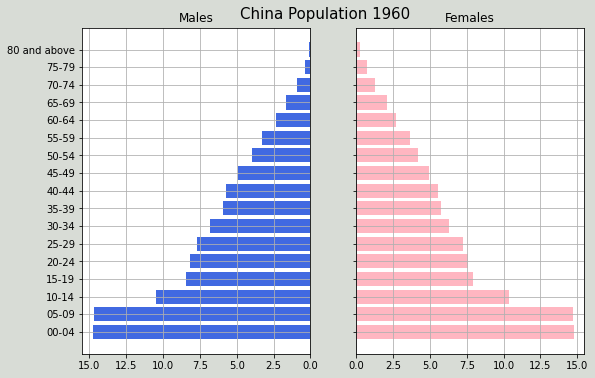

In [127]:
#single image

#define x and y limits
y = range(0, len(df))
x_male = df['Male']
x_female = df['Female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,'China Population ' + "1960", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df['Age group'])
axes[0].invert_xaxis()
axes[0].grid()

plt.savefig('china_population_plot/1960.png')
#display plot
plt.show()

In [ ]:
for i in range(1960, 2020):
  df = pd.pivot_table(ab_number, index = ['Age group'], columns = ['Gender'],values = str(i) ).reset_index()
  #define x and y limits
  y = range(0, len(df))
  x_male = df['Male']
  x_female = df['Female']

  #define plot parameters
  fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

  #specify background color and plot title
  fig.patch.set_facecolor('xkcd:light grey')
  plt.figtext(.5,.9,'China Population ' + str(i), fontsize=15, ha='center')
      
  #define male and female bars
  axes[0].barh(y, x_male, align='center', color='royalblue')
  axes[0].set(title='Males')
  axes[1].barh(y, x_female, align='center', color='lightpink')
  axes[1].set(title='Females')

  #adjust grid parameters and specify labels for y-axis
  axes[1].grid()
  axes[0].set(yticks=y, yticklabels=df['Age group'])
  axes[0].invert_xaxis()
  axes[0].grid()
  
  #output
  output_path = 'china_population_plot_numbers'
  filepath = os.path.join(output_path, str(i) +'_number.jpg')

  plt.savefig(filepath, dpi=200)
 
  #display plot
  plt.show()


In [ ]:
# #remove all files 
# import os
# import glob

# files = glob.glob('china_population_plot_numbers/*')
# for f in files:
#     os.remove(f)

In [123]:
import os
import imageio

png_dir = 'china_population_plot_numbers'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.jpg'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('animation/china_population_numbers.gif', images)